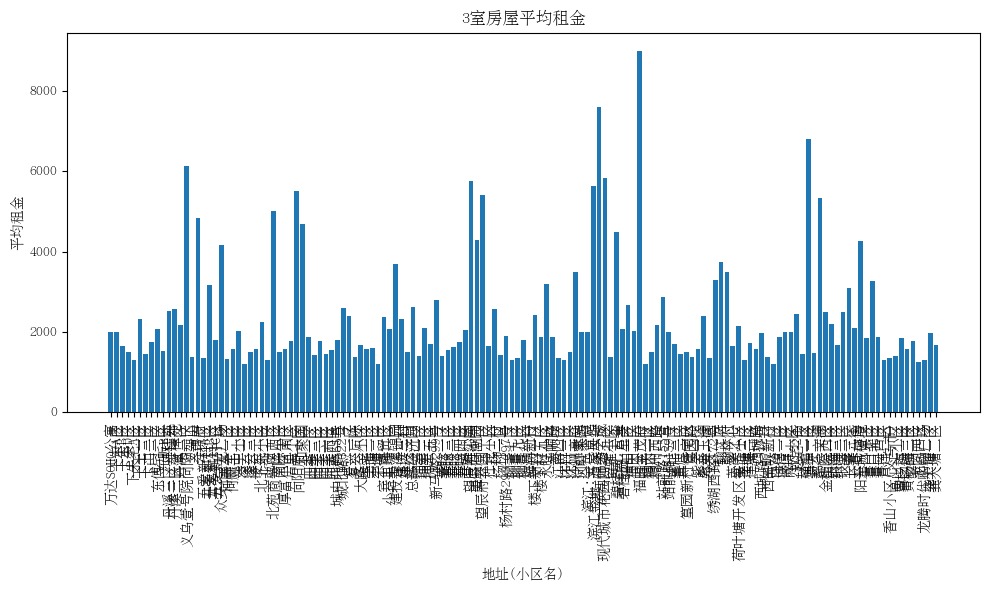

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['AR PL UMing CN']

# 读取csv文件
df = pd.read_csv('链家租房-义乌.csv')

# 计算每个小区的平均租金
average_rent = df.groupby('地址(小区名)')['价格'].mean()

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(average_rent.index, average_rent.values)
plt.xlabel('地址(小区名)')
plt.ylabel('平均租金')
plt.title('3室房屋平均租金')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [25]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Line
from pyecharts.globals import ChartType, ThemeType
import pandas as pd

# 读取csv文件
df = pd.read_csv('链家租房-义乌.csv')

# （1）该地级市房租最高的前五个小区统计
top_5_rent = df.groupby('地址(小区名)')['价格'].mean().sort_values(ascending=False).head(5)

# 使用pyecharts绘制柱状图
bar = (
    Bar()
    .add_xaxis(top_5_rent.index.tolist())
    .add_yaxis("平均租金", top_5_rent.values.tolist(), category_gap="50%")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="房租最高的前五个小区统计"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)),
        yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} 元")),
    )
    .set_series_opts(label_opts=opts.LabelOpts(position="top"))
)

bar.render('bar_chart.html')

# （2）合租、整租数量统计
rent_count = df.groupby(['所在区县', '出租类型'])['出租类型'].count().unstack().fillna(0)
if '合租' not in rent_count.columns:
    rent_count['合租'] = 0

# 使用pyecharts绘制折线图
line = (
    Line()
    .add_xaxis(rent_count.index.tolist())  # 将索引转换为列表
    .add_yaxis("合租", rent_count['合租'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("整租", rent_count['整租'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="合租、整租数量统计"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)),
        yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(formatter="{value} 个")),
    )
    .set_series_opts(label_opts=opts.LabelOpts(position="top"))
)

# 展示图表
line.render('line_chart.html')

'/home/acer/code/Wang/123/Lianjia/Lianjia/Lianjia/spiders/line_chart.html'